In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-data/flight_data.csv


# Import

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & Structure**

In [68]:
df = pd.read_csv('/kaggle/input/flight-data/flight_data.csv')

**Data Description**
* **Flight_ID: Unique identifiers for each flight.**
* **Date & Time: Timestamps indicating the date and time of each flight.**
* **Departure & Arrival Airports: Details about the airports involved in each flight, from departure to arrival.**
* **Temperature (Celsius): Temperature readings at the time of each flight.**
* **Wind Speed (knots): Information on wind speed during flight times.**
* **Turbulence Level: Categorized into High, Medium, or Low, indicating the level of turbulence experienced during flights**.**
* **Visibility (km): Visibility conditions during flight operations.**

In [69]:
df.head()

,Flight_ID,Date,Time,Departure_Airport,Arrival_Airport,Temperature_Celsius,Wind_Speed_knots,Turbulence_Level,Visibility_km
0,142,2024-10-11,10:25,ATL Airport,SEA Airport,35,45,High,19
1,110,2024-01-20,18:38,IAH Airport,AUS Airport,3,25,Low,6
2,113,2024-12-26,12:50,STL Airport,SEA Airport,20,48,Medium,6
3,3,2024-08-19,07:28,MCO Airport,LAS Airport,33,48,High,18
4,22,2024-12-07,07:10,LAX Airport,SEA Airport,28,34,Low,20


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Flight_ID            10000 non-null  int64 
 1   Date                 10000 non-null  object
 2   Time                 10000 non-null  object
 3   Departure_Airport    10000 non-null  object
 4   Arrival_Airport      10000 non-null  object
 5   Temperature_Celsius  10000 non-null  int64 
 6   Wind_Speed_knots     10000 non-null  int64 
 7   Turbulence_Level     10000 non-null  object
 8   Visibility_km        10000 non-null  object
dtypes: int64(3), object(6)
memory usage: 703.2+ KB


In [71]:
df.shape

(10000, 9)

In [72]:
df.describe()

,Flight_ID,Temperature_Celsius,Wind_Speed_knots
count,10000.000000,10000.000000,10000.000000
mean,100.685700,10.314800,24.906100
std,57.392387,17.594467,14.812286
min,1.000000,-20.000000,0.000000
25%,50.000000,-5.000000,12.000000
50%,102.000000,11.000000,25.000000
75%,150.000000,25.000000,38.000000
max,200.000000,40.000000,50.000000


In [73]:
df.isnull().sum()

Flight_ID              0
Date                   0
Time                   0
Departure_Airport      0
Arrival_Airport        0
Temperature_Celsius    0
Wind_Speed_knots       0
Turbulence_Level       0
Visibility_km          0
dtype: int64

# 2. Data Transform

In [74]:
df['Visibility_km'] = pd.to_numeric(df['Visibility_km'],errors = 'coerce')

In [75]:
# Change the type
cols = ['Temperature_Celsius', 'Wind_Speed_knots']

for column in cols:
    df[column] = df[column].astype(float)

In [76]:
def data_transform(df):
    df = df.drop(columns = ['Flight_ID'])
    df = df.dropna()
    
    def labeling(value):                      #  Turbulence_Level transform
        if value == "High" :                  #  High -> 2, Medium -> 1, Low -> 0
            return 2
        elif value == "Medium" :
            return 1
        else:
            return 0
        
        return None
    
    df['Level'] = df['Turbulence_Level'].apply(labeling)
    df = df.drop(columns = ['Turbulence_Level'])
    df = df.astype({'Level':'int64'})
    
    return df

train = data_transform(df.copy())
train.head()

,Date,Time,Departure_Airport,Arrival_Airport,Temperature_Celsius,Wind_Speed_knots,Visibility_km,Level
0,2024-10-11,10:25,ATL Airport,SEA Airport,35.0,45.0,19.0,2
1,2024-01-20,18:38,IAH Airport,AUS Airport,3.0,25.0,6.0,0
2,2024-12-26,12:50,STL Airport,SEA Airport,20.0,48.0,6.0,1
3,2024-08-19,07:28,MCO Airport,LAS Airport,33.0,48.0,18.0,2
4,2024-12-07,07:10,LAX Airport,SEA Airport,28.0,34.0,20.0,0


**Train infomation**

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 9999 non-null   object 
 1   Time                 9999 non-null   object 
 2   Departure_Airport    9999 non-null   object 
 3   Arrival_Airport      9999 non-null   object 
 4   Temperature_Celsius  9999 non-null   float64
 5   Wind_Speed_knots     9999 non-null   float64
 6   Visibility_km        9999 non-null   float64
 7   Level                9999 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 703.1+ KB


# 3. Data Visualization

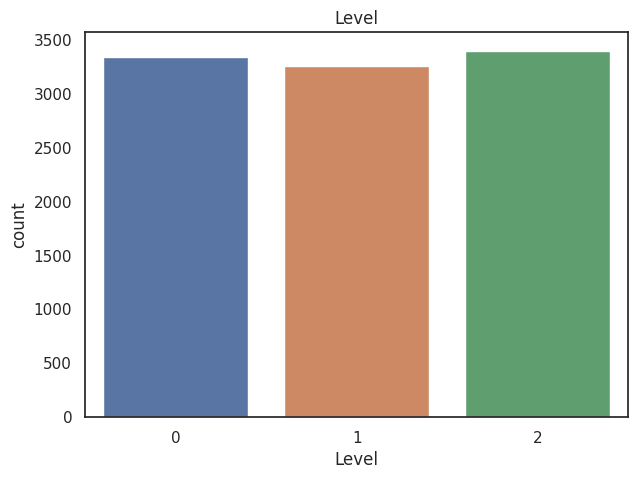

Level
2    3399
0    3342
1    3258
Name: count, dtype: int64

In [78]:
plt.figure(figsize=(7,5))
sb.countplot(data = train , x= 'Level')
plt.title('Level')
plt.show()

train['Level'].value_counts()

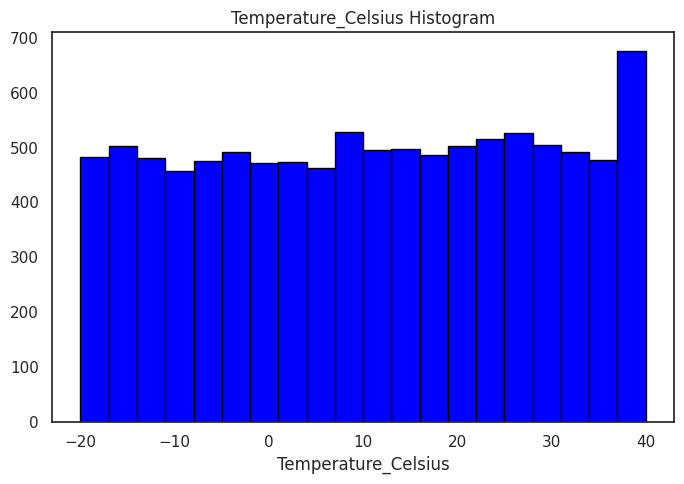

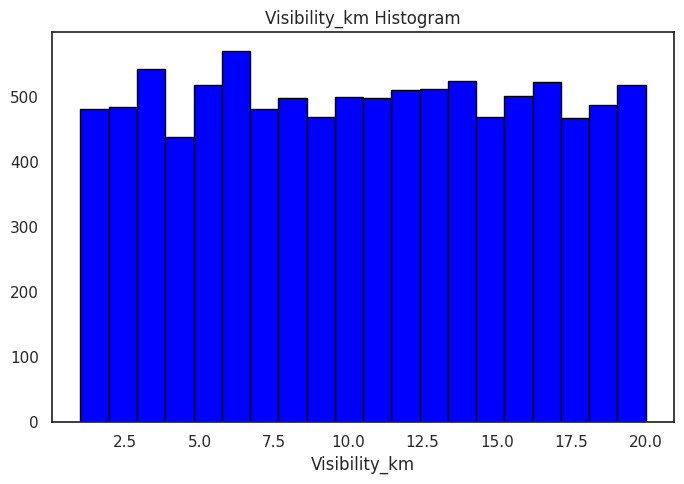

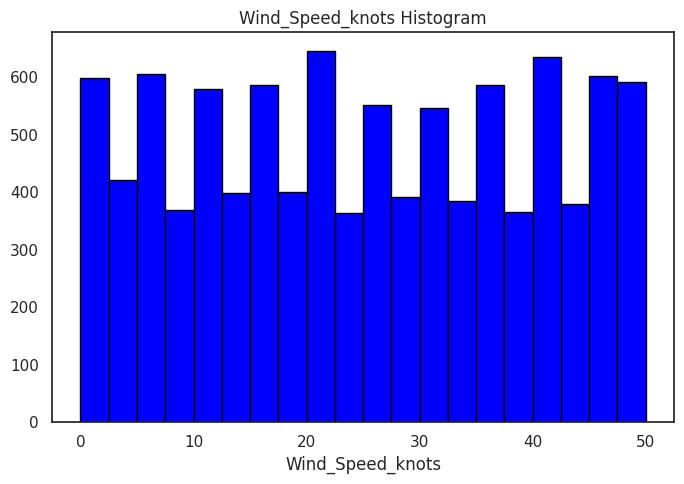

In [79]:
cols = ['Temperature_Celsius' ,'Visibility_km','Wind_Speed_knots']

for i in cols:
    plt.figure(figsize=(7,5))
    plt.hist(train[i], bins=20, color='blue', edgecolor='black')
    plt.xlabel(f'{i}')
    plt.title(f'{i} Histogram')
    plt.tight_layout()
    plt.show()

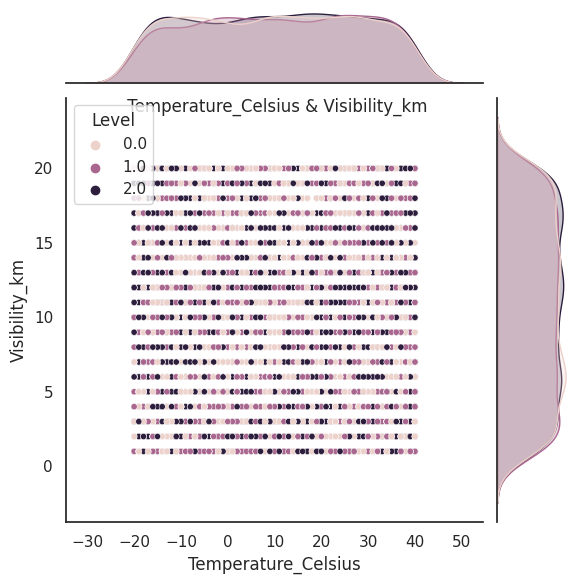

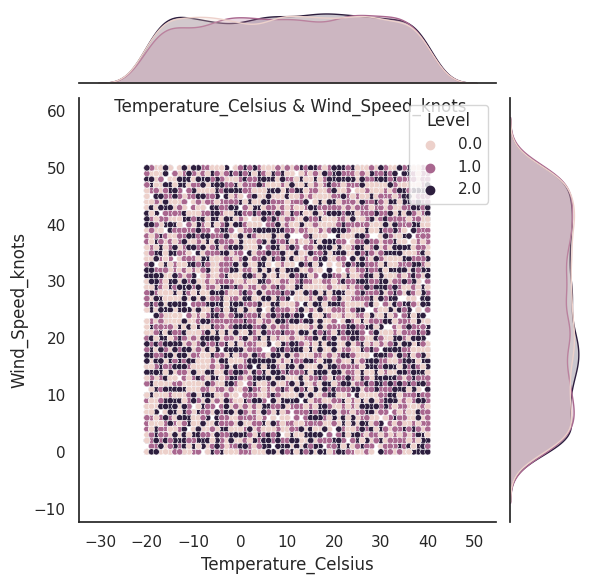

In [80]:
cols = ['Visibility_km','Wind_Speed_knots']

for i in cols:
    sb.set(style="white") 
    sb.jointplot(x='Temperature_Celsius',y= df[i],hue='Level',data=train,s=20)
    plt.title(f' Temperature_Celsius & {i}', pad = -10)
    plt.show()


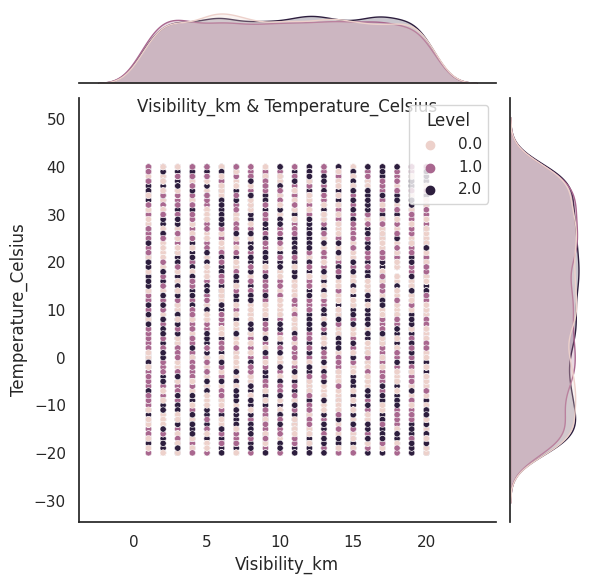

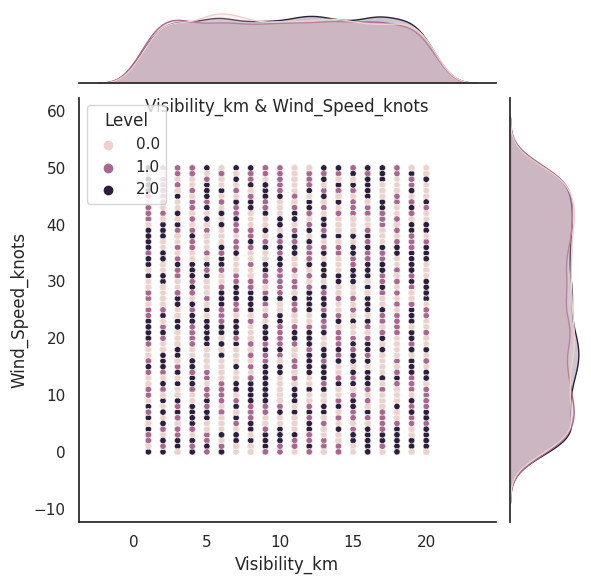

In [81]:
cols = ['Temperature_Celsius' ,'Wind_Speed_knots']

for i in cols:
    sb.set(style="white") 
    sb.jointplot(x='Visibility_km',y= df[i],hue='Level',data=train,s=20)
    plt.title(f'Visibility_km & {i}', pad = -10)
    plt.show()

In [82]:
cols = ['Temperature_Celsius' ,'Visibility_km','Wind_Speed_knots']

train[cols].corr()

,Temperature_Celsius,Visibility_km,Wind_Speed_knots
Temperature_Celsius,1.000000,0.003373,-0.009773
Visibility_km,0.003373,1.000000,-0.015213
Wind_Speed_knots,-0.009773,-0.015213,1.000000


<Axes: >

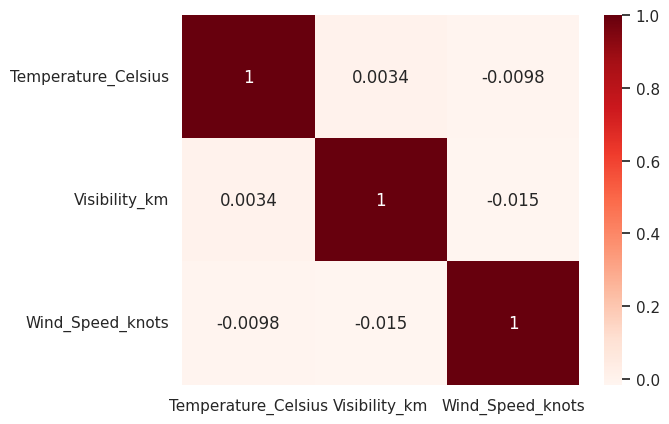

In [83]:
sb.heatmap(train[cols].corr(),annot=True,cmap='Reds')

# 4. Modeling

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [85]:
x = train[['Temperature_Celsius' ,'Visibility_km','Wind_Speed_knots']]
y = train['Level']

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**LinearRegression**

In [87]:
md_lr = LinearRegression()

In [88]:
md_lr.fit(x_train,y_train)

LinearRegression()

In [89]:
pred_lr = md_lr.predict(x_test)

**Evaluation**

In [90]:
print(f'MAE : {mean_absolute_error(y_test,pred_lr)}')
print(f'MSE : {mean_squared_error(y_test,pred_lr)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test,pred_lr))}')
print(f'r2_score : {r2_score(y_test,pred_lr)}')

MAE : 0.6691249055152085
MSE : 0.6651488312599022
RMSE : 0.8155665707101427
r2_score : -0.00044044313340352303


* **MAE : 0.6691249055152085**
* **MSE : 0.6651488312599022**
* **RMSE : 0.8155665707101427**
* **r2_score : -0.00044044313340352303**

**RandomForestRegressor**

In [91]:
md_rf = RandomForestRegressor(random_state=42)

In [92]:
md_rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [93]:
pred_rf = md_rf.predict(x_test)

**Model Evaluation**

In [94]:
print(f'MAE : {mean_absolute_error(y_test,pred_rf)}')
print(f'MSE : {mean_squared_error(y_test,pred_rf)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test,pred_rf))}')
print(f'r2_score : {r2_score(y_test,pred_rf)}')

MAE : 0.7680768347763347
MSE : 0.8160521186546686
RMSE : 0.9033560309505154
r2_score : -0.22741182850823138


* **MAE : 0.7680768347763347**
* **MSE : 0.8160521186546686**
* **RMSE : 0.9033560309505154**
* **r2_score : -0.22741182850823138**

**The smaller the MAE and MSE, the better the model, so linear regression is a better model.**